# Reconcile annotations for the RBC-GEM

## Setup
### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from rbc_gem_utils import (
    COBRA_CONFIGURATION,
    ROOT_PATH,
    ANNOTATION_PATH,
    MODEL_PATH,
    INTERIM_PATH,
    read_rbc_model,
    compare_tables,
    visualize_comparison,
)

### Define configuration
#### COBRA Configuration

In [2]:
COBRA_CONFIGURATION

Attribute,Description,Value
solver,Mathematical optimization solver,gurobi
tolerance,"General solver tolerance (feasibility, integrality, etc.)",1e-07
lower_bound,Default reaction lower bound,-1000.0
upper_bound,Default reaction upper bound,1000.0
processes,Number of parallel processes,15
cache_directory,Path for the model cache,/Users/zhaiman/Library/Caches/cobrapy
max_cache_size,Maximum cache size in bytes,104857600
cache_expiration,Model cache expiration time in seconds (if any),None


## Load RBC-GEM model
### Current Version: 0.2.0

In [3]:
model = read_rbc_model(filetype="xml")
model.reactions.sort()
model.genes.sort()
model.metabolites.sort()
model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-28


Name,iAB_RBC_283
Memory address,14c0899a0
Number of metabolites,342
Number of reactions,469
Number of genes,349
Number of groups,33
Objective expression,1.0*NaKt - 1.0*NaKt_reverse_db47e
Compartments,"cytosol, extracellular space"


## Create annotation tables

In [4]:
annotation_dirpath = f"{ROOT_PATH}{ANNOTATION_PATH}"
compare = True
overwrite = True
model_annotation_dfs = {
    "reactions": None,
    "metabolites": None,
    "genes": None,
}
to_double_check = {
    "reactions": {},
    "metabolites": {},
    "genes": {},
}

### Reactions

In [5]:
annotation_type = "reactions"
databases = ["MetAtlas"]
df_annotations = pd.read_csv(
    f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
    sep="\t", 
    index_col=0,
    dtype=str,
)
df_annotations = df_annotations.set_index(annotation_type)
df_annotations = df_annotations.rename({c: f"{c}_MODEL" for c in df_annotations.columns}, axis=1)

for db_tag in databases:
    df = pd.read_csv(
        f"{annotation_dirpath}/{annotation_type}_{db_tag}.tsv", 
        sep="\t",
        index_col=0,
        dtype=str,
    ).set_index(annotation_type)
    df.columns = [f"{c}_{db_tag}" for c in df.columns]
    df_annotations = df_annotations.merge(
        df,
        left_index=True,
        right_index=True,
        how="left",
    )

# Keep database tags on duplicate columns for reconcilliation, remove for unique columns
unique_columns = set([name.rsplit("_", 1)[0] for name in df_annotations.columns])
to_double_check[annotation_type] = {
    unique: [
        name for name in df_annotations.columns
        if name.rsplit("_", 1)[0] == unique
    ] for unique in unique_columns
}
unique_mapping = {
    to_double_check[annotation_type].pop(unique).pop(): unique
    for unique, dbs in to_double_check[annotation_type].copy().items()
    if len(dbs) == 1
}
print(f"Annotation columns to reconcile: {to_double_check[annotation_type]}")
df_annotations

Annotation columns to reconcile: {'metanetx.reaction': ['metanetx.reaction_MODEL', 'metanetx.reaction_MetAtlas'], 'metatlas': ['metatlas_MODEL', 'metatlas_MetAtlas'], 'bigg.reaction': ['bigg.reaction_MODEL', 'bigg.reaction_MetAtlas'], 'reactome': ['reactome_MODEL', 'reactome_MetAtlas'], 'kegg.reaction': ['kegg.reaction_MODEL', 'kegg.reaction_MetAtlas'], 'spontaneous': ['spontaneous_MODEL', 'spontaneous_MetAtlas'], 'tcdb': ['tcdb_MODEL', 'tcdb_MetAtlas'], 'vmhreaction': ['vmhreaction_MODEL', 'vmhreaction_MetAtlas'], 'rhea': ['rhea_MODEL', 'rhea_MetAtlas']}


,bigg.reaction_MODEL,biocyc_MODEL,ec-code_MODEL,kegg.reaction_MODEL,metanetx.reaction_MODEL,metatlas_MODEL,reactome_MODEL,rhea_MODEL,sabiork.reaction_MODEL,sbo_MODEL,...,vmhreaction_MODEL,metatlas_MetAtlas,kegg.reaction_MetAtlas,bigg.reaction_MetAtlas,reactome_MetAtlas,vmhreaction_MetAtlas,metanetx.reaction_MetAtlas,tcdb_MetAtlas,rhea_MetAtlas,spontaneous_MetAtlas
reactions,,,,,,,,,,,,,,,,,,,,,
3MOXTYRESSte,3MOXTYRESSte,NaN,NaN,NaN,MNXR94930,MAR11306,NaN,NaN,NaN,SBO:0000185,...,3MOXTYRESSte,MAR11306,NaN,3MOXTYRESSte,NaN,3MOXTYRESSte,MNXR94930,NaN,NaN,0
4PYRDXABCte,4PYRDX,NaN,NaN,NaN,MNXR95053,MAR08103,NaN,NaN,NaN,SBO:0000185,...,4PYRDX,MAR08103,NaN,4PYRDX,NaN,4PYRDX,MNXR95053,NaN,NaN,0
5AOPt2,5AOPt2,NaN,NaN,NaN,MNXR95061,MAR11307,NaN,NaN,NaN,SBO:0000185,...,5AOPt2,MAR11307,NaN,5AOPt2,NaN,5AOPt2,MNXR95061,NaN,NaN,0
ACALDt,ACALDt,NaN,NaN,NaN,MNXR95212,MAR04948,R-HSA-449872,NaN,NaN,SBO:0000185,...,ACALDt,MAR04948,NaN,ACALDt,NaN,ACALDt,MNXR95212,NaN,NaN,0
ACGAM2E,ACGAM2E,META:RXN-16006,5.1.3.8,R01207,MNXR95247,MAR04527,NaN,NaN,1441,SBO:0000176,...,ACGAM2E,MAR04527,R01207,ACGAM2E,NaN,ACGAM2E,MNXR95247,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UREAt,UREAt,META:TRANS-RXN0-460,NaN,NaN,MNXR105156,MAR04949,R-HSA-507875;R-HSA-507873;R-HSA-444126,32799,NaN,SBO:0000185,...,UREAt,MAR04949,NaN,UREAt,NaN,UREAt,MNXR105156,1.A.28.1.3,32799,0
URIt,URIt,NaN,NaN,NaN,MNXR105165,MAR05035,NaN,NaN,NaN,SBO:0000185,...,URIt,MAR05035,NaN,URIt,NaN,URIt,MNXR105165,2.A.57.1.4,NaN,0
XYLK,XYLK,META:XYLULOKIN-RXN,2.7.1.17,R01639,MNXR105255,MAR04595,R-HSA-5662466,10964,NaN,SBO:0000176,...,XYLK,MAR04595,R01639,NaN,NaN,XYLK,MNXR105255,NaN,10964,0


#### Reconcile columns

In [6]:
key = "rhea"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key

for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    reaction = model.reactions.get_by_id(idx)
    if reaction.boundary:
        df_column[idx] = row[f"{key}_MetAtlas"]
        continue
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]


df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)
to_double_check[annotation_type]

key = "metanetx.reaction"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key

for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]

df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "metatlas"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key

for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]

df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "kegg.reaction"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key

for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]

df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)


key = "spontaneous"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key

for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]

df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "tcdb"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key

for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]

df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "vmhreaction"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key

for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]

df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "bigg.reaction"
df_column = df_annotations[f"{key}_MODEL"]
df_column.name = key
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)


key = "reactome"
df_column = df_annotations[f"{key}_MODEL"]
df_column.name = key
# Only keep human annotations
df_column = df_column.dropna().apply(
    lambda items: ";".join([
        x for x in items.split(";") 
        if x.startswith("R-HSA")
    ])
)
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

# Overwrite 
df_annotations = df_annotations.rename(unique_mapping, axis=1)
df_annotations = df_annotations.drop([x for x in df_annotations.columns if x == "REMOVE"], axis=1)
df_annotations = df_annotations.reset_index(drop=False)
model_annotation_dfs[annotation_type] = df_annotations
df_annotations

,reactions,biocyc,ec-code,sabiork.reaction,sbo,seed.reaction,rhea,metanetx.reaction,metatlas,kegg.reaction,spontaneous,tcdb,vmhreaction,bigg.reaction,reactome
0,3MOXTYRESSte,NaN,NaN,NaN,SBO:0000185,NaN,NaN,MNXR94930,MAR11306,NaN,0,NaN,3MOXTYRESSte,3MOXTYRESSte,NaN
1,4PYRDXABCte,NaN,NaN,NaN,SBO:0000185,NaN,NaN,MNXR95053,MAR08103,NaN,0,NaN,4PYRDX,4PYRDX,NaN
2,5AOPt2,NaN,NaN,NaN,SBO:0000185,rxn09702,NaN,MNXR95061,MAR11307,NaN,0,NaN,5AOPt2,5AOPt2,NaN
3,ACALDt,NaN,NaN,NaN,SBO:0000185,rxn09700;rxn08033;rxn13212;rxn08032,NaN,MNXR95212,MAR04948,NaN,0,NaN,ACALDt,ACALDt,R-HSA-449872
4,ACGAM2E,META:RXN-16006,5.1.3.8,1441,SBO:0000176,rxn00897,NaN,MNXR95247,MAR04527,R01207,0,NaN,ACGAM2E,ACGAM2E,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,UREAt,META:TRANS-RXN0-460,NaN,NaN,SBO:0000185,rxn09369;rxn05667;rxn09368,32799,MNXR105156,MAR04949,NaN,0,1.A.28.1.3,UREAt,UREAt,R-HSA-507875;R-HSA-507873;R-HSA-444126
465,URIt,NaN,NaN,NaN,SBO:0000185,rxn10987;rxn09372,NaN,MNXR105165,MAR05035,NaN,0,2.A.57.1.4,URIt,URIt,NaN
466,XYLK,META:XYLULOKIN-RXN,2.7.1.17,NaN,SBO:0000176,rxn01199,10964,MNXR105255,MAR04595,R01639,0,NaN,XYLK,XYLK,R-HSA-5662466
467,XYLTD_Dx,META:D-XYLULOSE-REDUCTASE-RXN,1.1.1.14;1.1.1.9,1954,SBO:0000176,rxn01385,20433,MNXR105262,MAR04593,R01896,0,NaN,XYLTD_Dr;r0784,XYLTD_D,R-HSA-5662471


#### Save annotations

,reactions,biocyc,ec-code,sabiork.reaction,sbo,seed.reaction,rhea,metanetx.reaction,metatlas,kegg.reaction,spontaneous,tcdb,vmhreaction,bigg.reaction,reactome
0,3MOXTYRESSte,NaN,NaN,NaN,SBO:0000185,NaN,NaN,MNXR94930,MAR11306,NaN,0,NaN,3MOXTYRESSte,3MOXTYRESSte,NaN
1,4PYRDXABCte,NaN,NaN,NaN,SBO:0000185,NaN,NaN,MNXR95053,MAR08103,NaN,0,NaN,4PYRDX,4PYRDX,NaN
2,5AOPt2,NaN,NaN,NaN,SBO:0000185,rxn09702,NaN,MNXR95061,MAR11307,NaN,0,NaN,5AOPt2,5AOPt2,NaN
3,ACALDt,NaN,NaN,NaN,SBO:0000185,rxn09700;rxn08033;rxn13212;rxn08032,NaN,MNXR95212,MAR04948,NaN,0,NaN,ACALDt,ACALDt,R-HSA-449872
4,ACGAM2E,META:RXN-16006,5.1.3.8,1441,SBO:0000176,rxn00897,NaN,MNXR95247,MAR04527,R01207,0,NaN,ACGAM2E,ACGAM2E,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,UREAt,META:TRANS-RXN0-460,NaN,NaN,SBO:0000185,rxn09369;rxn05667;rxn09368,32799,MNXR105156,MAR04949,NaN,0,1.A.28.1.3,UREAt,UREAt,R-HSA-507875;R-HSA-507873;R-HSA-444126
465,URIt,NaN,NaN,NaN,SBO:0000185,rxn10987;rxn09372,NaN,MNXR105165,MAR05035,NaN,0,2.A.57.1.4,URIt,URIt,NaN
466,XYLK,META:XYLULOKIN-RXN,2.7.1.17,NaN,SBO:0000176,rxn01199,10964,MNXR105255,MAR04595,R01639,0,NaN,XYLK,XYLK,R-HSA-5662466
467,XYLTD_Dx,META:D-XYLULOSE-REDUCTASE-RXN,1.1.1.14;1.1.1.9,1954,SBO:0000176,rxn01385,20433,MNXR105262,MAR04593,R01896,0,NaN,XYLTD_Dr;r0784,XYLTD_D,R-HSA-5662471


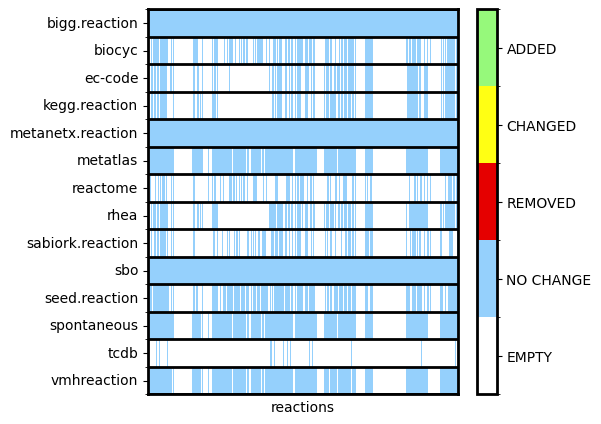

In [7]:
assert len(to_double_check[annotation_type]) == 0, f"There are still columns with data that need reconcilliation: {to_double_check[annotation_type]}"
df_annotations = model_annotation_dfs[annotation_type]

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type])
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations

### Metabolites

In [8]:
annotation_type = "metabolites"
databases = ["MetAtlas"]


df_annotations = pd.read_csv(
    f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
    sep="\t", 
    index_col=0,
    dtype=str,
)
df_annotations = df_annotations.set_index(annotation_type)
df_annotations = df_annotations.rename({c: f"{c}_MODEL" for c in df_annotations.columns}, axis=1)

for db_tag in databases:
    df = pd.read_csv(
        f"{annotation_dirpath}/{annotation_type}_{db_tag}.tsv", 
        sep="\t",
        index_col=0,
        dtype=str,
    ).set_index(annotation_type)
    df.columns = [f"{c}_{db_tag}" for c in df.columns]
    df_annotations = df_annotations.merge(
        df,
        left_index=True,
        right_index=True,
        how="left",
    )

# Keep database tags on duplicate columns for reconcilliation, remove for unique columns
unique_columns = set([name.rsplit("_", 1)[0] for name in df_annotations.columns])
to_double_check[annotation_type] = {
    unique: [
        name for name in df_annotations.columns
        if name.rsplit("_", 1)[0] == unique
    ] for unique in unique_columns
}
unique_mapping = {
    to_double_check[annotation_type].pop(unique).pop(): unique
    for unique, dbs in to_double_check[annotation_type].copy().items()
    if len(dbs) == 1
}
print(f"Annotation columns to reconcile: {to_double_check[annotation_type]}")
df_annotations

Annotation columns to reconcile: {'bigg.metabolite': ['bigg.metabolite_MODEL', 'bigg.metabolite_MetAtlas'], 'lipidmaps': ['lipidmaps_MODEL', 'lipidmaps_MetAtlas'], 'chebi': ['chebi_MODEL', 'chebi_MetAtlas'], 'vmhmetabolite': ['vmhmetabolite_MODEL', 'vmhmetabolite_MetAtlas'], 'hmdb': ['hmdb_MODEL', 'hmdb_MetAtlas'], 'metanetx.chemical': ['metanetx.chemical_MODEL', 'metanetx.chemical_MetAtlas'], 'metatlas': ['metatlas_MODEL', 'metatlas_MetAtlas'], 'pubchem.compound': ['pubchem.compound_MODEL', 'pubchem.compound_MetAtlas'], 'kegg.compound': ['kegg.compound_MODEL', 'kegg.compound_MetAtlas']}


,bigg.metabolite_MODEL,biocyc_MODEL,chebi_MODEL,envipath_MODEL,hmdb_MODEL,inchikey_MODEL,kegg.compound_MODEL,kegg.drug_MODEL,kegg.glycan_MODEL,lipidmaps_MODEL,...,vmhmetabolite_MODEL,metatlas_MetAtlas,bigg.metabolite_MetAtlas,kegg.compound_MetAtlas,hmdb_MetAtlas,chebi_MetAtlas,pubchem.compound_MetAtlas,lipidmaps_MetAtlas,vmhmetabolite_MetAtlas,metanetx.chemical_MetAtlas
metabolites,,,,,,,,,,,,,,,,,,,,,
13dpg_c,13dpg,META:DPG,CHEBI:16001,NaN,HMDB62758,LJQLQCAXBUHEAZ-UWTATZPHSA-J,C00236,NaN,NaN,NaN,...,13dpg,MAM00247c,13dpg,C00236,NaN,CHEBI:16001,439191,NaN,13dpg,MNXM261
23dpg_c,23dpg,META:23-DIPHOSPHOGLYCERATE,CHEBI:17720,NaN,HMDB01294,XOHUEYCVLUUEJJ-UWTATZPHSA-I,C01159,NaN,NaN,NaN,...,23dpg,MAM00569c,23dpg,C01159,NaN,CHEBI:17720,NaN,NaN,23dpg,MNXM146487;MNXM892
2kmb_c,2kmb,META:CPD-479,CHEBI:33574,NaN,HMDB01553;HMDB13210,SXFSQZDSUWACKX-UHFFFAOYSA-M,C01180,NaN,NaN,LMFA01060170,...,2kmb,MAM01016c,2kmb,C01180,NaN,CHEBI:33574,NaN,LMFA01060170,2kmb,MNXM276
2pg_c,2pg,META:2-PG,CHEBI:17835,NaN,HMDB00362;HMDB62707;HMDB03391,GXIURPTVHJPJLF-UWTATZPHSA-K,C00631,NaN,NaN,NaN,...,2pg,MAM00674c,2pg,C00631,NaN,CHEBI:17835,439278,NaN,2pg,MNXM275
35camp_c,camp,META:CAMP,CHEBI:17489,NaN,HMDB0000058,IVOMOUWHDPKRLL-KQYNXXCUSA-M,C00575,NaN,NaN,NaN,...,camp,MAM01419c,camp,C00575,HMDB0000058,CHEBI:17489,6076,NaN,camp,MNXM243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xmp_c,xmp,META:XANTHOSINE-5-PHOSPHATE,CHEBI:15652,NaN,HMDB01554;HMDB62755,DCTLYFZHFGENCW-UUOKFMHZSA-L,C00655,NaN,NaN,NaN,...,xmp,MAM03150c,xmp,C00655,NaN,CHEBI:15652,73323,NaN,xmp,MNXM298
xu5p__D_c,xu5p__D,META:XYLULOSE-5-PHOSPHATE,CHEBI:16332,NaN,HMDB06212;HMDB00868,FNZLKVNUWIIPSJ-RFZPGFLSSA-L,C00231,NaN,NaN,NaN,...,xu5p_D,MAM01761c,xu5p__D,C00231,NaN,CHEBI:16332,439190,NaN,xu5p_D,MNXM186
xylt_c,xylt,META:XYLITOL,CHEBI:1305691,NaN,HMDB0002917,HEBKCHPVOIAQTA-SCDXWVJYSA-N,C00379,D00061,NaN,NaN,...,xylt,MAM03155c,xylt,C00379,HMDB0002917,CHEBI:1305691,6912,NaN,xylt,MNXM510


#### Reconcile columns

In [9]:
key = "metanetx.chemical"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key

for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]

df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "kegg.compound"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key

for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]

df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "hmdb"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key

for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]

df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "chebi"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key

for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]

df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "bigg.metabolite"
df_column = df_annotations[f"{key}_MODEL"]
df_column.name = key
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "lipidmaps"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key
for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "metatlas"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key
for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "vmhmetabolite"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key
for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "pubchem.compound"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key
for idx, row in df_annotations.loc[:, to_double_check[annotation_type][key]].iterrows():
    # Preserve old ID to prevent loss of ID
    if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_MetAtlas"]:
        df_column[idx] = row[f"{key}_MODEL"]
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

# Overwrite 
df_annotations = df_annotations.rename(unique_mapping, axis=1)
df_annotations = df_annotations.drop([x for x in df_annotations.columns if x == "REMOVE"], axis=1)
df_annotations = df_annotations.reset_index(drop=False)
model_annotation_dfs[annotation_type] = df_annotations
df_annotations

,metabolites,biocyc,envipath,inchikey,kegg.drug,kegg.glycan,reactome,sabiork.compound,sbo,seed.compound,slm,metanetx.chemical,kegg.compound,hmdb,chebi,bigg.metabolite,lipidmaps,metatlas,vmhmetabolite,pubchem.compound
0,13dpg_c,META:DPG,NaN,LJQLQCAXBUHEAZ-UWTATZPHSA-J,NaN,NaN,29800,21215,SBO:0000247,cpd00203,NaN,MNXM261,C00236,HMDB62758,CHEBI:16001,13dpg,NaN,MAM00247c,13dpg,439191
1,23dpg_c,META:23-DIPHOSPHOGLYCERATE,NaN,XOHUEYCVLUUEJJ-UWTATZPHSA-I,NaN,NaN,6798337,20899;1355,SBO:0000247,cpd00853;cpd02119,NaN,MNXM146487;MNXM892,C01159,HMDB01294,CHEBI:17720,23dpg,NaN,MAM00569c,23dpg,NaN
2,2kmb_c,META:CPD-479,NaN,SXFSQZDSUWACKX-UHFFFAOYSA-M,NaN,NaN,1237122,5424,SBO:0000247,cpd00869,NaN,MNXM276,C01180,HMDB01553;HMDB13210,CHEBI:33574,2kmb,LMFA01060170,MAM01016c,2kmb,NaN
3,2pg_c,META:2-PG,NaN,GXIURPTVHJPJLF-UWTATZPHSA-K,NaN,NaN,30485,31,SBO:0000247,cpd00482,NaN,MNXM275,C00631,HMDB00362;HMDB62707;HMDB03391,CHEBI:17835,2pg,NaN,MAM00674c,2pg,439278
4,35camp_c,META:CAMP,NaN,IVOMOUWHDPKRLL-KQYNXXCUSA-M,NaN,NaN,30389,1379,SBO:0000247,cpd00446,NaN,MNXM243,C00575,HMDB0000058,CHEBI:17489,camp,NaN,MAM01419c,camp,6076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,xmp_c,META:XANTHOSINE-5-PHOSPHATE,NaN,DCTLYFZHFGENCW-UUOKFMHZSA-L,NaN,NaN,111584,1686,SBO:0000247,cpd00497,NaN,MNXM298,C00655,HMDB01554;HMDB62755,CHEBI:15652,xmp,NaN,MAM03150c,xmp,73323
338,xu5p__D_c,META:XYLULOSE-5-PHOSPHATE,NaN,FNZLKVNUWIIPSJ-RFZPGFLSSA-L,NaN,NaN,29790,1317,SBO:0000247,cpd00198,NaN,MNXM186,C00231,HMDB06212;HMDB00868,CHEBI:16332,xu5p__D,NaN,MAM01761c,xu5p_D,439190
339,xylt_c,META:XYLITOL,NaN,HEBKCHPVOIAQTA-SCDXWVJYSA-N,D00061,NaN,5660033,2033,SBO:0000247,cpd00306,NaN,MNXM510,C00379,HMDB0002917,CHEBI:1305691,xylt,NaN,MAM03155c,xylt,6912
340,xylu__D_c,META:D-XYLULOSE,NaN,ZAQJHHRNXZUBTE-WUJLRWPWSA-N,NaN,NaN,5661281,1504,SBO:0000247,cpd00259,NaN,MNXM597,C00310,HMDB0001644,CHEBI:17140,xylu__D,NaN,MAM01759c,xylu_D,5289590


#### Save annotations

,metabolites,biocyc,envipath,inchikey,kegg.drug,kegg.glycan,reactome,sabiork.compound,sbo,seed.compound,slm,metanetx.chemical,kegg.compound,hmdb,chebi,bigg.metabolite,lipidmaps,metatlas,vmhmetabolite,pubchem.compound
0,13dpg_c,META:DPG,NaN,LJQLQCAXBUHEAZ-UWTATZPHSA-J,NaN,NaN,29800,21215,SBO:0000247,cpd00203,NaN,MNXM261,C00236,HMDB62758,CHEBI:16001,13dpg,NaN,MAM00247c,13dpg,439191
1,23dpg_c,META:23-DIPHOSPHOGLYCERATE,NaN,XOHUEYCVLUUEJJ-UWTATZPHSA-I,NaN,NaN,6798337,20899;1355,SBO:0000247,cpd00853;cpd02119,NaN,MNXM146487;MNXM892,C01159,HMDB01294,CHEBI:17720,23dpg,NaN,MAM00569c,23dpg,NaN
2,2kmb_c,META:CPD-479,NaN,SXFSQZDSUWACKX-UHFFFAOYSA-M,NaN,NaN,1237122,5424,SBO:0000247,cpd00869,NaN,MNXM276,C01180,HMDB01553;HMDB13210,CHEBI:33574,2kmb,LMFA01060170,MAM01016c,2kmb,NaN
3,2pg_c,META:2-PG,NaN,GXIURPTVHJPJLF-UWTATZPHSA-K,NaN,NaN,30485,31,SBO:0000247,cpd00482,NaN,MNXM275,C00631,HMDB00362;HMDB62707;HMDB03391,CHEBI:17835,2pg,NaN,MAM00674c,2pg,439278
4,35camp_c,META:CAMP,NaN,IVOMOUWHDPKRLL-KQYNXXCUSA-M,NaN,NaN,30389,1379,SBO:0000247,cpd00446,NaN,MNXM243,C00575,HMDB0000058,CHEBI:17489,camp,NaN,MAM01419c,camp,6076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,xmp_c,META:XANTHOSINE-5-PHOSPHATE,NaN,DCTLYFZHFGENCW-UUOKFMHZSA-L,NaN,NaN,111584,1686,SBO:0000247,cpd00497,NaN,MNXM298,C00655,HMDB01554;HMDB62755,CHEBI:15652,xmp,NaN,MAM03150c,xmp,73323
338,xu5p__D_c,META:XYLULOSE-5-PHOSPHATE,NaN,FNZLKVNUWIIPSJ-RFZPGFLSSA-L,NaN,NaN,29790,1317,SBO:0000247,cpd00198,NaN,MNXM186,C00231,HMDB06212;HMDB00868,CHEBI:16332,xu5p__D,NaN,MAM01761c,xu5p_D,439190
339,xylt_c,META:XYLITOL,NaN,HEBKCHPVOIAQTA-SCDXWVJYSA-N,D00061,NaN,5660033,2033,SBO:0000247,cpd00306,NaN,MNXM510,C00379,HMDB0002917,CHEBI:1305691,xylt,NaN,MAM03155c,xylt,6912
340,xylu__D_c,META:D-XYLULOSE,NaN,ZAQJHHRNXZUBTE-WUJLRWPWSA-N,NaN,NaN,5661281,1504,SBO:0000247,cpd00259,NaN,MNXM597,C00310,HMDB0001644,CHEBI:17140,xylu__D,NaN,MAM01759c,xylu_D,5289590


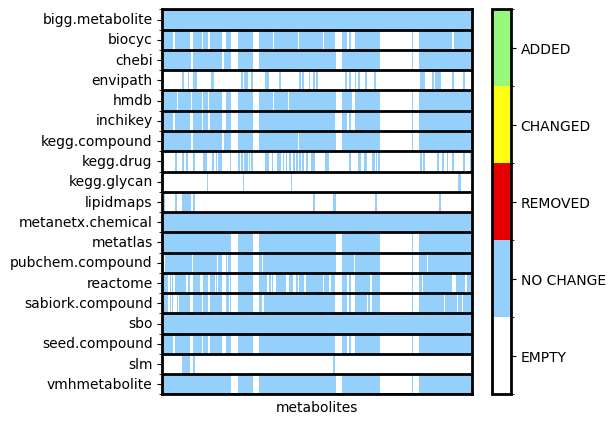

In [10]:
assert len(to_double_check[annotation_type]) == 0, f"There are still columns with data that need reconcilliation: {to_double_check[annotation_type]}"
df_annotations = model_annotation_dfs[annotation_type]

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type])
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations

### Genes

In [11]:
annotation_type = "genes"
databases = ["UniProt", "MIM", "MetAtlas"]
objects = model.reactions
df_annotations = pd.read_csv(
    f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
    sep="\t", 
    index_col=0,
    dtype=str,
)
df_annotations = df_annotations.set_index(annotation_type).rename({"omim": "mim"}, axis=1)
df_annotations = df_annotations.rename({c: f"{c}_MODEL" for c in df_annotations.columns}, axis=1)

for db_tag in databases:
    df = pd.read_csv(
        f"{annotation_dirpath}/{annotation_type}_{db_tag}.tsv", 
        sep="\t",
        index_col=0,
        dtype=str,
    ).set_index(annotation_type).rename({"omim": "mim"}, axis=1)
    df.columns = [f"{c}_{db_tag}" for c in df.columns]
    df_annotations = df_annotations.merge(
        df,
        left_index=True,
        right_index=True,
        how="outer",
    )

# Keep database tags on duplicate columns for reconcilliation, remove for unique columns
unique_columns = set([name.rsplit("_", 1)[0] for name in df_annotations.columns])
to_double_check[annotation_type] = {
    unique: [
        name for name in df_annotations.columns
        if name.rsplit("_", 1)[0] == unique
    ] for unique in unique_columns
}
unique_mapping = {
    to_double_check[annotation_type].pop(unique).pop(): unique
    for unique, dbs in to_double_check[annotation_type].copy().items()
    if len(dbs) == 1
}
print(f"Annotation columns to reconcile: {to_double_check[annotation_type]}")
df_annotations

Annotation columns to reconcile: {'hgnc.symbol': ['hgnc.symbol_MODEL', 'hgnc.symbol_UniProt', 'hgnc.symbol_MIM', 'hgnc.symbol_MetAtlas'], 'ensembl': ['ensembl_MODEL', 'ensembl_MIM', 'ensembl_MetAtlas'], 'ncbigene': ['ncbigene_MODEL', 'ncbigene_UniProt', 'ncbigene_MIM', 'ncbigene_MetAtlas'], 'mim': ['mim_MODEL', 'mim_MODEL', 'mim_UniProt', 'mim_MIM'], 'uniprot.isoform': ['uniprot.isoform_MODEL', 'uniprot.isoform_UniProt'], 'refseq': ['refseq_MODEL', 'refseq_UniProt'], 'ccds': ['ccds_MODEL', 'ccds_UniProt'], 'drugbank': ['drugbank_MODEL', 'drugbank_UniProt'], 'uniprot': ['uniprot_MODEL', 'uniprot_UniProt', 'uniprot_MetAtlas']}


,ccds_MODEL,drugbank_MODEL,ensembl_MODEL,hgnc.symbol_MODEL,hprd_MODEL,mim_MODEL,ncbigene_MODEL,ncbigi_MODEL,mim_MODEL,refseq_MODEL,...,drugbank_UniProt,mim_MIM,ncbigene_MIM,hgnc.symbol_MIM,ensembl_MIM,mgi_MIM,ensembl_MetAtlas,uniprot_MetAtlas,hgnc.symbol_MetAtlas,ncbigene_MetAtlas
genes,,,,,,,,,,,,,,,,,,,,,
10007_AT1,CCDS4272.1,DB02445;DB02379;DB03951,ENSG00000113552,GNPDA1,09048,601798,10007,NaN,601798,NP_005462.1;XP_006714810.1,...,DB02445;DB02379;DB03951,601798,10007,GNPDA1,ENSG00000113552,MGI:1347054,ENSG00000113552,P46926,GNPDA1,10007
100_AT1,CCDS13335.1,DB07711;DB07783;DB07786;DB04218;DB07785;DB0301...,ENSG00000196839,ADA,NaN,102700;608958,100,NaN,608958,NP_000013.2,...,DB07711;DB07783;DB07786;DB04218;DB07785;DB0301...,102700;608958,100,ADA,ENSG00000196839,MGI:87916,ENSG00000196839,P00813,ADA,100
10201_AT1,CCDS77734.1,NaN,ENSG00000172113,NME6,NaN,608294,10201,NaN,608294,NP_001295355.1;NP_001295356.1;NP_001295357.1,...,NaN,608294,10201,NME6,ENSG00000172113,MGI:1861676,ENSG00000172113,O75414,NME6,10201
10257_AT1,CCDS9474.1,DB00718;DB00770;DB01076;DB00171;DB01327;DB0048...,ENSG00000125257,ABCC4,NaN,605250,10257,NaN,NaN,NP_005836.2,...,DB00718;DB00770;DB01076;DB00171;DB01327;DB0048...,605250,10257,ABCC4,ENSG00000125257,MGI:2443111,ENSG00000125257,O15439,ABCC4,10257
10327_AT1,CCDS523.1,DB08904;DB09130;DB00997;DB00898;DB06077;DB0015...,ENSG00000117448,AKR1A1,NaN,103830,10327,NaN,103830,NP_001189342.1;NP_001189343.1;NP_006057.1;NP_6...,...,DB08904;DB09130;DB00997;DB00898;DB06077;DB0015...,103830,10327,AKR1A1,ENSG00000117448,MGI:1929955,ENSG00000117448,P14550,AKR1A1,10327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867_AT2,CCDS33540.3,NaN,ENSG00000159082,SYNJ1,NaN,604297;615530;617389,8867,NaN,604297,NP_982271.2,...,NaN,604297;615530;617389,8867,SYNJ1,ENSG00000159082,MGI:1354961,ENSG00000159082,O43426,SYNJ1,8867
9162_AT1,CCDS5845.1,DB14001,ENSG00000157680,DGKI,07238,604072,9162,1012282641;1034657385;1034657393;1034657397;10...,604072,NP_001308637.1;NP_001308638.1;NP_001308639.1;N...,...,DB14001,604072,9162,DGKI,ENSG00000157680,MGI:2443430,ENSG00000157680,O75912,DGKI,9162
9429_AT1,CCDS3628.1,DB12001;DB08916;DB11363;DB00437;DB12015;DB0349...,ENSG00000118777,ABCG2,NaN,138900;603756;614490,9429,NaN,603756,NP_004818.2;XP_011530722.1,...,DB12001;DB08916;DB11363;DB00437;DB12015;DB0349...,138900;603756;614490,9429,ABCG2,ENSG00000118777,MGI:1347061;MGI:1351624,ENSG00000118777,Q9UNQ0,ABCG2,9429


#### Reconcile columns

In [12]:
key = "hgnc.symbol"
df_column = df_annotations[f"{key}_UniProt"]
df_column.name = key
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "uniprot"
df_column = df_annotations[f"{key}_UniProt"]
df_column.name = key
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "ccds"
df_column = df_annotations[f"{key}_UniProt"]
df_column.name = key
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "uniprot.isoform"
df_column = df_annotations[f"{key}_UniProt"]
df_column.name = key
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "ncbigene"
df_column = df_annotations[f"{key}_UniProt"]
df_column.name = key
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "refseq"
df_column = df_annotations[f"{key}_UniProt"]
df_column.name = key
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "drugbank"
df_column = df_annotations[f"{key}_UniProt"]
df_column.name = key
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "mim"
df_column = df_annotations[f"{key}_MIM"]
df_column.name = key
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

key = "ensembl"
df_column = df_annotations[f"{key}_MetAtlas"]
df_column.name = key
df_annotations[key] = df_column
df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
to_double_check[annotation_type].pop(key)

# Overwrite 
df_annotations = df_annotations.rename(unique_mapping, axis=1)
df_annotations = df_annotations.drop([x for x in df_annotations.columns if x == "REMOVE"], axis=1)
df_annotations = df_annotations.reset_index(drop=False)
model_annotation_dfs[annotation_type] = df_annotations
df_annotations

,genes,hprd,ncbigi,sbo,mgi,hgnc.symbol,uniprot,ccds,uniprot.isoform,ncbigene,refseq,drugbank,mim,ensembl
0,10007_AT1,09048,NaN,SBO:0000243,MGI:1347054,GNPDA1,P46926,CCDS4272.1,P46926-1,10007,NP_005462.1;XP_006714810.1,DB02445;DB02379;DB03951,601798,ENSG00000113552
1,100_AT1,NaN,NaN,SBO:0000243,MGI:87916,ADA,P00813,CCDS13335.1,P00813-1,100,NP_000013.2,DB07711;DB07783;DB07786;DB04218;DB07785;DB0301...,102700;608958,ENSG00000196839
2,10201_AT1,NaN,NaN,SBO:0000243,MGI:1861676,NME6,O75414,CCDS77734.1,O75414-1,10201,NP_001295355.1;NP_001295356.1;NP_001295357.1,NaN,608294,ENSG00000172113
3,10257_AT1,NaN,NaN,SBO:0000243,MGI:2443111,ABCC4,O15439,CCDS9474.1,O15439-1,10257,NP_005836.2,DB00718;DB00770;DB01076;DB00171;DB01327;DB0048...,605250,ENSG00000125257
4,10327_AT1,NaN,NaN,SBO:0000243,MGI:1929955,AKR1A1,P14550,CCDS523.1,P14550-1,10327,NP_001189342.1;NP_001189343.1;NP_006057.1;NP_6...,DB08904;DB09130;DB00997;DB00898;DB06077;DB0015...,103830,ENSG00000117448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,8867_AT2,NaN,NaN,SBO:0000243,MGI:1354961,SYNJ1,O43426,CCDS33540.3,O43426-2,8867,NP_982271.2,NaN,604297;615530;617389,ENSG00000159082
345,9162_AT1,07238,1012282641;1034657385;1034657393;1034657397;10...,SBO:0000243,MGI:2443430,DGKI,O75912,CCDS5845.1,O75912-1,9162,NP_001308637.1;NP_001308638.1;NP_001308639.1;N...,DB14001,604072,ENSG00000157680
346,9429_AT1,NaN,NaN,SBO:0000243,MGI:1347061;MGI:1351624,ABCG2,Q9UNQ0,CCDS3628.1,Q9UNQ0-1,9429,NP_004818.2;XP_011530722.1,DB12001;DB08916;DB11363;DB00437;DB12015;DB0349...,138900;603756;614490,ENSG00000118777
347,9468_AT1,05376,NaN,SBO:0000243,MGI:2147987,PCYT1B,Q9Y5K3,CCDS14213.1,Q9Y5K3-1,9468,NP_004836.2,DB00122;DB14006,300948,ENSG00000102230


#### Save annotations

,genes,hprd,ncbigi,sbo,mgi,hgnc.symbol,uniprot,ccds,uniprot.isoform,ncbigene,refseq,drugbank,mim,ensembl
0,10007_AT1,09048,NaN,SBO:0000243,MGI:1347054,GNPDA1,P46926,CCDS4272.1,P46926-1,10007,NP_005462.1;XP_006714810.1,DB02445;DB02379;DB03951,601798,ENSG00000113552
1,100_AT1,NaN,NaN,SBO:0000243,MGI:87916,ADA,P00813,CCDS13335.1,P00813-1,100,NP_000013.2,DB07711;DB07783;DB07786;DB04218;DB07785;DB0301...,102700;608958,ENSG00000196839
2,10201_AT1,NaN,NaN,SBO:0000243,MGI:1861676,NME6,O75414,CCDS77734.1,O75414-1,10201,NP_001295355.1;NP_001295356.1;NP_001295357.1,NaN,608294,ENSG00000172113
3,10257_AT1,NaN,NaN,SBO:0000243,MGI:2443111,ABCC4,O15439,CCDS9474.1,O15439-1,10257,NP_005836.2,DB00718;DB00770;DB01076;DB00171;DB01327;DB0048...,605250,ENSG00000125257
4,10327_AT1,NaN,NaN,SBO:0000243,MGI:1929955,AKR1A1,P14550,CCDS523.1,P14550-1,10327,NP_001189342.1;NP_001189343.1;NP_006057.1;NP_6...,DB08904;DB09130;DB00997;DB00898;DB06077;DB0015...,103830,ENSG00000117448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,8867_AT2,NaN,NaN,SBO:0000243,MGI:1354961,SYNJ1,O43426,CCDS33540.3,O43426-2,8867,NP_982271.2,NaN,604297;615530;617389,ENSG00000159082
345,9162_AT1,07238,1012282641;1034657385;1034657393;1034657397;10...,SBO:0000243,MGI:2443430,DGKI,O75912,CCDS5845.1,O75912-1,9162,NP_001308637.1;NP_001308638.1;NP_001308639.1;N...,DB14001,604072,ENSG00000157680
346,9429_AT1,NaN,NaN,SBO:0000243,MGI:1347061;MGI:1351624,ABCG2,Q9UNQ0,CCDS3628.1,Q9UNQ0-1,9429,NP_004818.2;XP_011530722.1,DB12001;DB08916;DB11363;DB00437;DB12015;DB0349...,138900;603756;614490,ENSG00000118777
347,9468_AT1,05376,NaN,SBO:0000243,MGI:2147987,PCYT1B,Q9Y5K3,CCDS14213.1,Q9Y5K3-1,9468,NP_004836.2,DB00122;DB14006,300948,ENSG00000102230


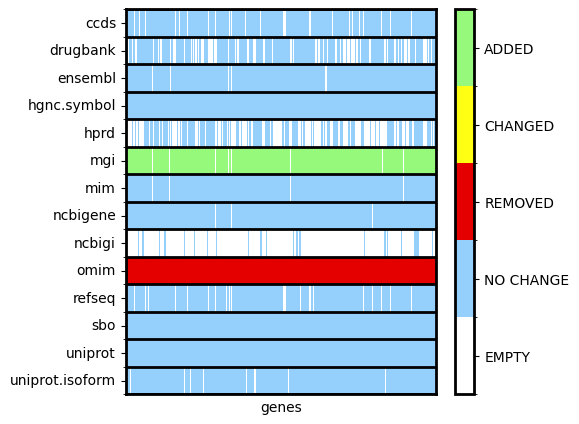

In [13]:
assert len(to_double_check[annotation_type]) == 0, f"There are still columns with data that need reconcilliation: {to_double_check[annotation_type]}"
df_annotations = model_annotation_dfs[annotation_type]

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type])
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations